In [1]:

import pandas as pd
import datetime

import pymysql



MYSQL_HOST = 'localhost'
MYSQL_DB = 'TwStock'
MYSQL_USER = 'teb101Club'
MYSQL_PASS = 'teb101Club'

def connect_mysql():  #連線資料庫
    global connect, cursor
    connect = pymysql.connect(host = MYSQL_HOST, db = MYSQL_DB, user = MYSQL_USER, password = MYSQL_PASS,
            charset = 'utf8', use_unicode = True)
    cursor = connect.cursor()

connect_mysql()
df = pd.read_sql('SELECT date, open, high, low, close FROM transactions where sid=2330', con = connect, index_col = 'date') 


df=df.rename(index=str, columns={'open':'Open', 'high':'High', 'low':'Low', 'close':'Close'})

df



,Open,High,Low,Close
date,,,,
2019-11-01 00:00:00,299.5,299.5,296.5,299.0
2019-11-04 00:00:00,302.5,308.0,301.0,307.0
2019-11-05 00:00:00,307.5,310.5,307.0,310.5
2019-11-06 00:00:00,309.0,311.5,308.0,311.0
2019-11-07 00:00:00,310.0,310.0,306.5,309.0
...,...,...,...,...
2020-05-22 00:00:00,294.5,295.0,291.0,292.0
2020-05-25 00:00:00,290.5,293.0,288.5,292.0
2020-05-26 00:00:00,295.0,297.5,293.5,295.5


In [25]:
#pip install mpl_finance
#pip install --upgrade mplfinance

D:\anaconda3\envs\keras\lib\site-packages\mplfinance\plotting.py:59: DeprecationWarning: 


     Default value is now `no_xgaps=True`
     However, to set `no_xgaps=False` and silence this warning,
     use instead: `show_nontrading=True`.

  category=DeprecationWarning)


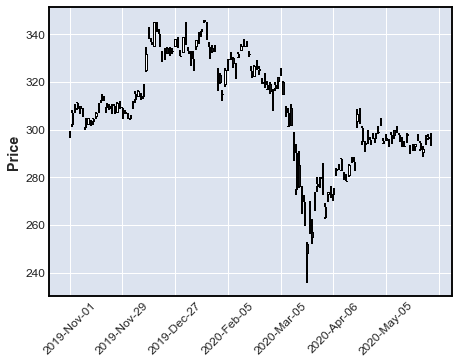

In [65]:
%matplotlib inline
import matplotlib.pyplot
import mplfinance as mpf
#from mpl_finance import candlestick_ohlc
df.index = pd.to_datetime(df.index) # Converting the dates from string to datetime format
mpf.plot(df[:], type='candlestick', no_xgaps = True)

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Converting the dates from string to datetime format:
#df.index = df.to_datetime(df.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = df[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(df.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mpl.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]

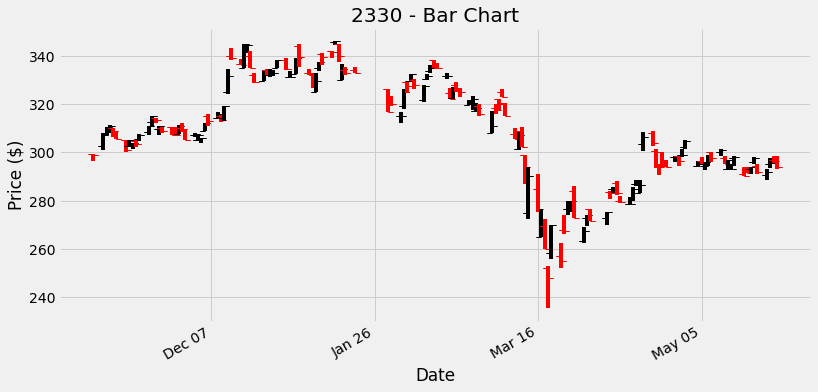

In [67]:
import mpl_finance as mpf # This is the old mpl-finance library - note the '_' in the library name

# We can now feed the ohlc matrix into mpl-finance to create a candle stick chart:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('2330 - Bar Chart')

# Choosing to display the dates as "Month Day":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# This is to automatically arrange the date labels in a readable way:
fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

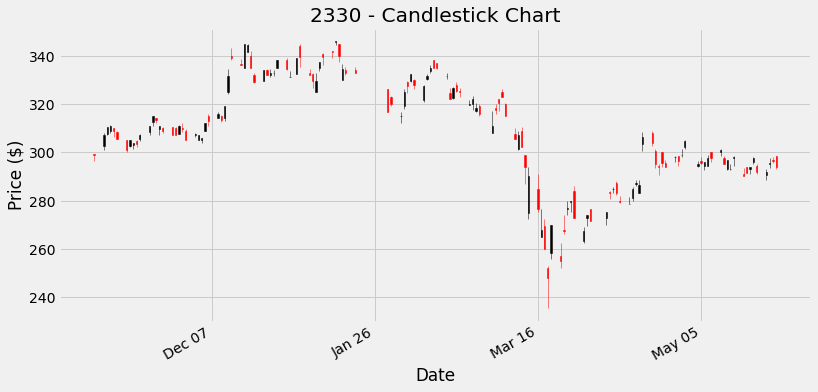

In [68]:
fig, ax = plt.subplots(figsize = (12,6))

mpf.candlestick_ohlc(ax, ohlc[:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('2330 - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

In [57]:
#pip install pyecharts

  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13704 sha256=1e506ca8e748177286ab5c6bbc475bb1f7423b3f599c3ef4b673d0a634b64413
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\8c\76\0b\eb9eb3da7e2335e3577e3f96a0ae9f74f206e26457bd1a2bc8
Successfully built prettytable
Note: you may need to restart the kernel to use updated packages.


In [6]:
#from pyecharts.charts import Kline
#dates = df.index
#kline = Kline('2330') 
#kline.add('日K', dates[-60:], values[-60:
stock_data_cleared=stock_data[stock_data['收盤價']>0]

stock_name=stock_data_cleared["名稱"][0]

row_count=stock_data_cleared.shape[0]
xtick_interval=int(row_count/20)
xtick_index=range(0,row_count,xtick_interval)

plt.figure(figsize=(12, 6)) 

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用來正常顯示中文標籤
plt.rcParams['axes.unicode_minus'] = False  # 用來正常顯示負號

plt.subplot(211)
plt.plot(range(row_count),stock_data_cleared['收盤價'],color="#ff6666")
#plt.xticks(xtick_index,stock_data_cleared.iloc[xtick_index,0],rotation=60)
plt.xticks(xtick_index,"")
plt.yticks(range(0,60,10))
#plt.xlabel("時間")
plt.ylabel("收盤價")
plt.grid(linewidth=0.5,color="#ff6666",alpha=0.5)
plt.title(stock_name+"\n\n股票代碼"+stock_code)

plt.subplot(212)
plt.bar(range(row_count),stock_data_cleared["成交量"],color="#008080")
plt.xticks(xtick_index,stock_data_cleared.iloc[xtick_index,0],rotation=70)
plt.grid(linewidth=0.5,color="#008080",alpha=0.5)

plt.subplots_adjust(hspace=0.1)
plt.ylabel("成交量")

plt.show()

KeyError: '收盤價'

In [ ]:
# In[3]:


stock_data_extracted=stock_data_cleared[["開盤價","收盤價","最低價","最高價","成交量","日期"]]


# In[4]:


#移動平均數計算
def moving_average(data,day_count):
    data=data.values[:,0]
    result=[]
    for i in range(len(data)):
        start_day_index=i-day_count+1
        if start_day_index<=0:
            start_day_index=0
        justified_day_count=i-start_day_index+1
        mean=data[start_day_index:i+1].sum()/justified_day_count
        result.append(mean)
    return result


# In[5]:


from pyecharts.charts import Page,Kline,Bar,Grid,Line
from pyecharts import options as opts
import webbrowser as wb



#k線
kline=(
    Kline()
    .add_xaxis(stock_data_extracted["日期"].values.tolist())
    .add_yaxis("K線圖", stock_data_extracted.iloc[:,:4].values.tolist())
    .set_global_opts(            
        xaxis_opts=opts.AxisOpts(is_scale=True,is_show=False),
        #axis_opts=opts.AxisOpts(is_scale=True,min_=0), #y軸起始座標可以設爲0
        yaxis_opts=opts.AxisOpts(is_scale=True), #y軸起始座標可自動調整
        title_opts=opts.TitleOpts(title="價格",subtitle=stock_name+"\n"+stock_code,pos_top="20%"),
        axispointer_opts=opts.AxisPointerOpts(
            is_show=True,
            link=[{"xAxisIndex": "all"}],
            label=opts.LabelOpts(background_color="#777"),
        ),        
        datazoom_opts=[ #設置zoom參數後即可縮放
            opts.DataZoomOpts(
                is_show=True,
                type_="inside",
                xaxis_index=[0,1], #設置第0軸和第1軸同時縮放
                range_start=0,
                range_end=100,
            ),
            opts.DataZoomOpts(
                is_show=True,
                xaxis_index=[0,1],
                type_="slider",
                pos_top="90%",
                range_start=0,
                range_end=100,
            ),
        ],

    )
)

#移動平均線
line = (
    Line()
    .add_xaxis(xaxis_data=stock_data_extracted["日期"].values.tolist())
    .add_yaxis(
        series_name="MA5",
        y_axis=moving_average(stock_data_extracted[["收盤價"]], 5),
        is_smooth=True,
        is_hover_animation=False,
        linestyle_opts=opts.LineStyleOpts(width=1, opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="MA10",
        y_axis=moving_average(stock_data_extracted[["收盤價"]], 10),
        is_smooth=True,
        is_hover_animation=False,
        linestyle_opts=opts.LineStyleOpts(width=1, opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="MA30",
        y_axis=moving_average(stock_data_extracted[["收盤價"]], 30),
        is_smooth=True,
        is_hover_animation=False,
        linestyle_opts=opts.LineStyleOpts(width=1, opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="MA60",
        y_axis=moving_average(stock_data_extracted[["收盤價"]], 60),
        is_smooth=True,
        is_hover_animation=False,
        linestyle_opts=opts.LineStyleOpts(width=1, opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="MA120",
        y_axis=moving_average(stock_data_extracted[["收盤價"]], 120),
        is_smooth=True,
        is_hover_animation=False,
        linestyle_opts=opts.LineStyleOpts(width=1, opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="MA240",
        y_axis=moving_average(stock_data_extracted[["收盤價"]], 240),
        is_smooth=True,
        is_hover_animation=False,
        linestyle_opts=opts.LineStyleOpts(width=1, opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="MA360",
        y_axis=moving_average(stock_data_extracted[["收盤價"]], 360),
        is_smooth=True,
        is_hover_animation=False,
        linestyle_opts=opts.LineStyleOpts(width=1, opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(xaxis_opts=opts.AxisOpts(type_="category"))
)

#將K線圖和移動平均線顯示在一個圖內
kline.overlap(line)

#成交量柱形圖
x=stock_data_extracted[["日期"]].values[:,0].tolist()
y=stock_data_extracted[["成交量"]].values[:,0].tolist()

bar = (
    Bar()
    .add_xaxis(x)
    .add_yaxis("成交量",y,label_opts=opts.LabelOpts(is_show=False),itemstyle_opts=opts.ItemStyleOpts(color="#008080"))
    .set_global_opts(title_opts=opts.TitleOpts(title="成交量",pos_top="70%"),
                     legend_opts=opts.LegendOpts(is_show=False),
                    )
)

#使用網格將多張圖標組合到一起顯示
grid_chart = Grid()

grid_chart.add(
    kline,
    grid_opts=opts.GridOpts(pos_left="15%", pos_right="8%", height="55%"),
)

grid_chart.add(
    bar,
    grid_opts=opts.GridOpts(pos_left="15%", pos_right="8%", pos_top="70%", height="20%"),
)

grid_chart.render("d:/kline_test.html")
wb.open("d:/kline_test.html")